### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV and
### Explore the dataset properties

In [3]:
fandango = pd.read_csv('fandango_scrape.csv')

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Relationship between popularity of a film and its rating

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

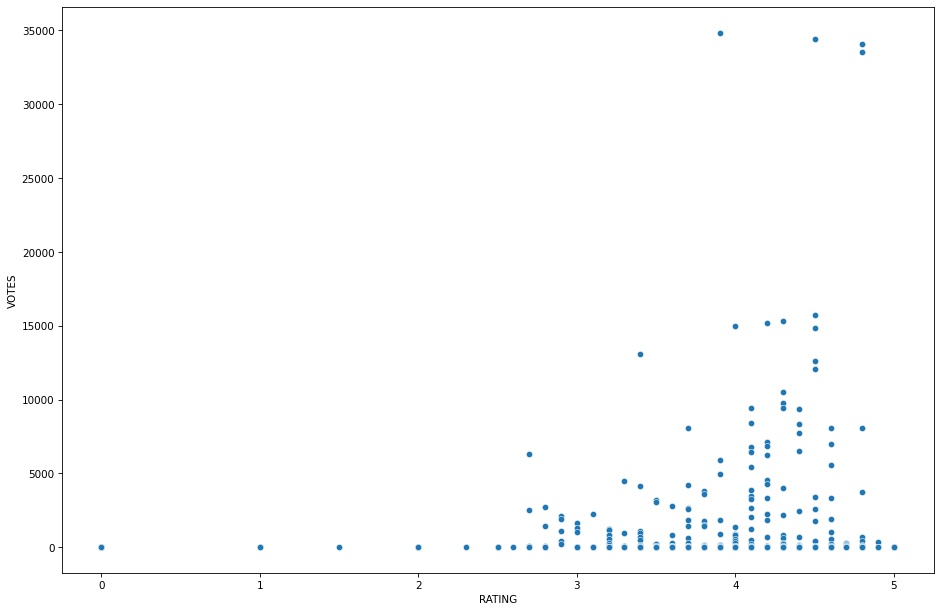

In [12]:
plt.figure(figsize=(15,10),dpi=75)
sns.scatterplot(x='RATING',y='VOTES',data=fandango)

### Correlation between columns

In [13]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Extracting year from the film title

In [46]:
fandango['YEAR_f'] = fandango['FILM'].apply(lambda film_title:film_title.split('(')[-1])

In [47]:
fandango['YEAR']=fandango['YEAR_f'].apply(lambda yr:yr.split(')')[0])

In [48]:
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [62]:
fandango=fandango.drop('YEAR_f',axis=1)

In [63]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [ ]:
### Number of films in the fandango dataset by year

In [49]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

### Plotting number of films per year

<AxesSubplot:xlabel='YEAR', ylabel='count'>

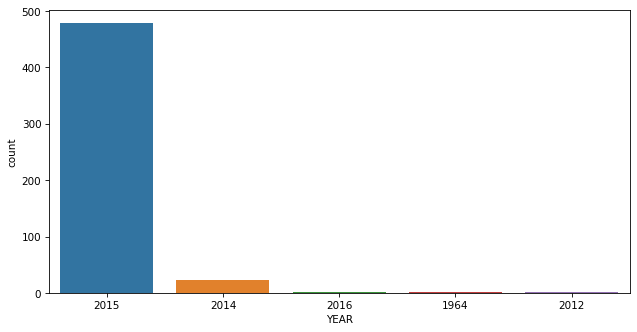

In [52]:
plt.figure(figsize=(10,5),dpi=75)
sns.countplot(x='YEAR',data=fandango)

In [ ]:
### Top 10 movies in terms of popularity (votes)

In [65]:
fandango.sort_values(by='VOTES',ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Movies having zero votes

In [67]:
fandango[fandango['VOTES']==0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


### Films having only reviews (zero votes)

In [72]:
reviewed_movies = fandango[fandango['VOTES']>0]

In [73]:
reviewed_movies

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


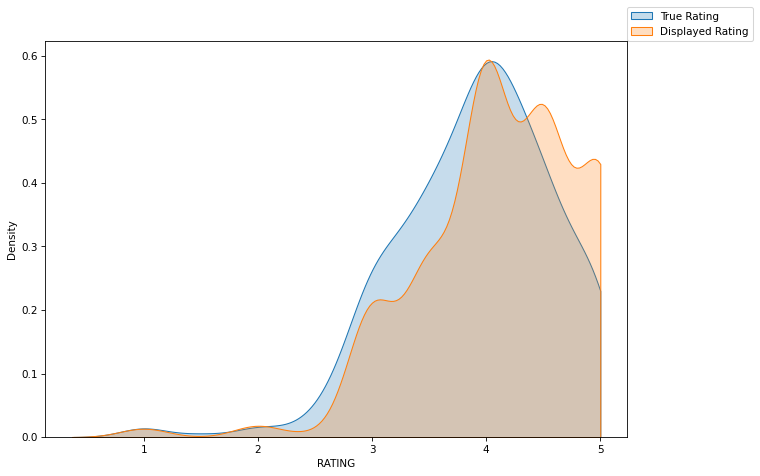

In [89]:
plt.figure(figsize=(10,7),dpi=75)
sns.kdeplot(x='RATING',data=reviewed_movies,fill=True,clip=[0,5],label='True Rating')
sns.kdeplot(x='STARS',data=reviewed_movies,fill=True,clip=[0,5],label='Displayed Rating')
plt.legend(loc=(1,1))

### Exploring difference between the ratings displayed on the website and actual ratings

In [91]:
reviewed_movies['Ratings_Difference'] = reviewed_movies['STARS'] - reviewed_movies['RATING']

/var/folders/m4/zyd288h545nfywr4hw6ln1b80000gn/T/ipykernel_10769/4178896314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_movies['Ratings_Difference'] = reviewed_movies['STARS'] - reviewed_movies['RATING']


In [97]:
reviewed_movies['Ratings_Difference'] = reviewed_movies['Ratings_Difference'].round(2)

/var/folders/m4/zyd288h545nfywr4hw6ln1b80000gn/T/ipykernel_10769/4235131414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_movies['Ratings_Difference'] = reviewed_movies['Ratings_Difference'].round(2)


<AxesSubplot:xlabel='Ratings_Difference', ylabel='count'>

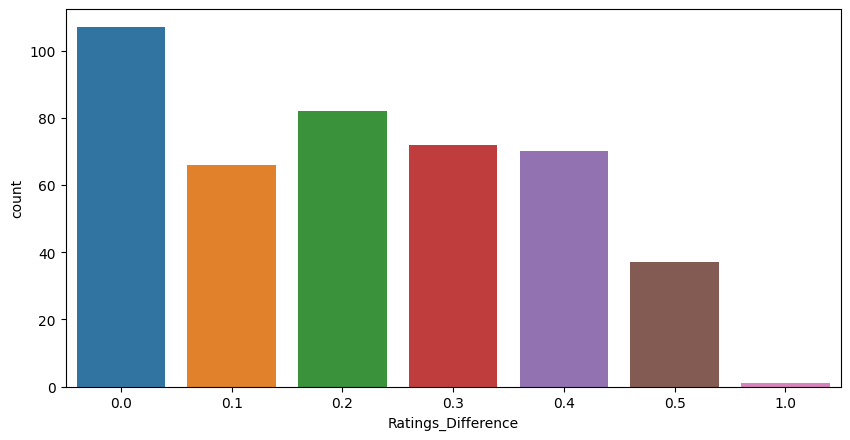

In [100]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(x='Ratings_Difference',data=reviewed_movies)


### Film with a difference of 1 between true and displayed rating

In [105]:
reviewed_movies[reviewed_movies['Ratings_Difference']==1]

,FILM,STARS,RATING,VOTES,YEAR,Ratings_Difference
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparing scores of Fandango with other sites

#### We have dataset from sites like Rotten Tomatoes, Metacritic, IMDb in a single CSV all_sites_scores.csv

In [108]:
all_sites_scores=pd.read_csv('all_sites_scores.csv')

In [109]:
all_sites_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [110]:
all_sites_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [112]:
all_sites_scores.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Exploring Rotten Tomatoes 

#### Rotten tomatoes have two sets of reviews: Critics reviews and user reviews

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

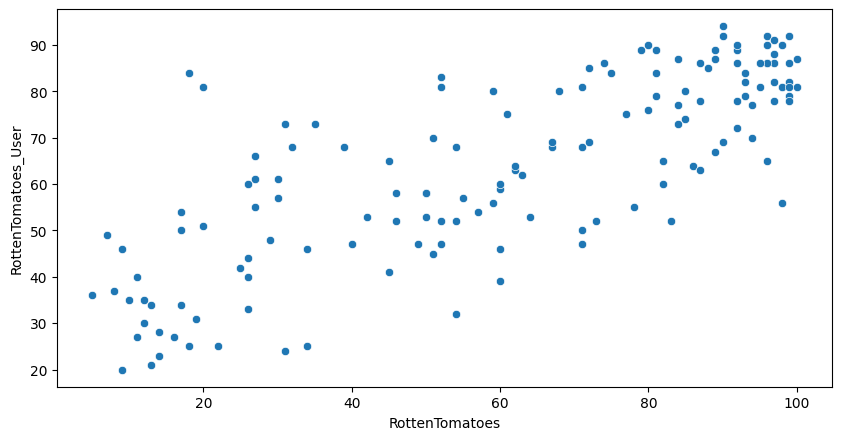

In [114]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites_scores)

### Difference between Rotten Tomatoes Critics and user ratings

In [115]:
all_sites_scores['RottenTomatoes_Diff'] = all_sites_scores['RottenTomatoes'] - all_sites_scores['RottenTomatoes_User']

In [ ]:
### Mean Absolute Difference between RT scores and RT User scores

In [117]:
all_sites_scores['RottenTomatoes_Diff'].apply(abs).mean()

15.095890410958905

### Distribution plot of differences between RT rating 

<AxesSubplot:xlabel='RottenTomatoes_Diff', ylabel='Count'>

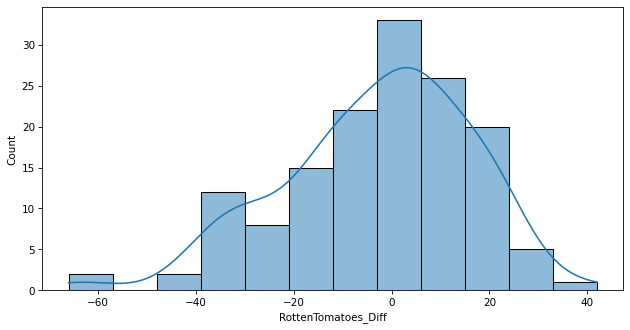

In [119]:
plt.figure(figsize=(10,5),dpi=75)
sns.histplot(x='RottenTomatoes_Diff',data=all_sites_scores,kde=True)

### Top 5 movies rated higher by users than critics

In [128]:
all_sites_scores.nsmallest(5,'RottenTomatoes_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

### Top 5 movies rated higher by critics 

In [129]:
all_sites_scores.nlargest(5,'RottenTomatoes_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

### Exploring Metacritic
#### Plotting Metacritic user and critic reviews

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

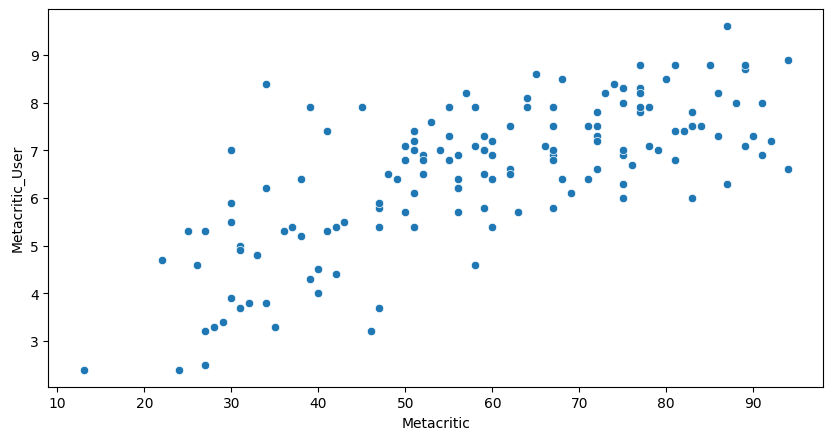

In [134]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(x='Metacritic',y='Metacritic_User',data=all_sites_scores)

In [ ]:
### Plotting Metacritic & IMDB vote counts

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

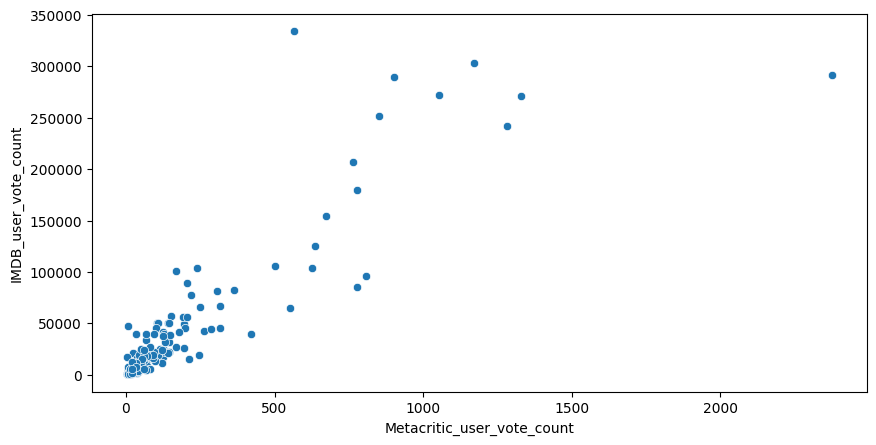

In [138]:
plt.figure(figsize=(10,5),dpi=100)

sns.scatterplot(x='Metacritic_user_vote_count',y='IMDB_user_vote_count',data=all_sites_scores)

### Two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings.
### Movie having the highest IMDB user vote count?

In [146]:
all_sites_scores.sort_values('IMDB_user_vote_count',ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


### Movie having the highest Metacritic User Vote count?

In [147]:
all_sites_scores.sort_values('Metacritic_user_vote_count',ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

### Combining both data frames : fandango and all_sites_scores 

In [148]:
combined_df=pd.merge(fandango,all_sites_scores,how='inner',on='FILM')

In [150]:
combined_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, normalizing these values so they all fall between 0-5 stars and the relationship between reviews stays the same.



In [153]:
combined_df['RT_Norm'] = np.round(combined_df['RottenTomatoes']/20,1)
combined_df['RT_User_Norm'] = np.round(combined_df['RottenTomatoes_User']/20,1)

In [154]:
combined_df['Metacritic_Norm'] = np.round(combined_df['Metacritic']/20,1)
combined_df['Metacritic_User_Norm'] = np.round(combined_df['Metacritic_User']/2,1)

In [155]:
combined_df['IMDB_Norm'] = np.round(combined_df['IMDB']/2,1)

In [156]:
combined_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


### Creating a dataframe having only normalized scores of all ratings along with 'STARS' & 'RATING' column

In [157]:
norm_scores = combined_df[['STARS','RATING','RT_Norm','RT_User_Norm','Metacritic_Norm','Metacritic_User_Norm','IMDB_Norm']]

In [158]:
norm_scores.head()

,STARS,RATING,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Plot comparing the distributions of normalized ratings across all sites. 

<AxesSubplot:ylabel='Density'>

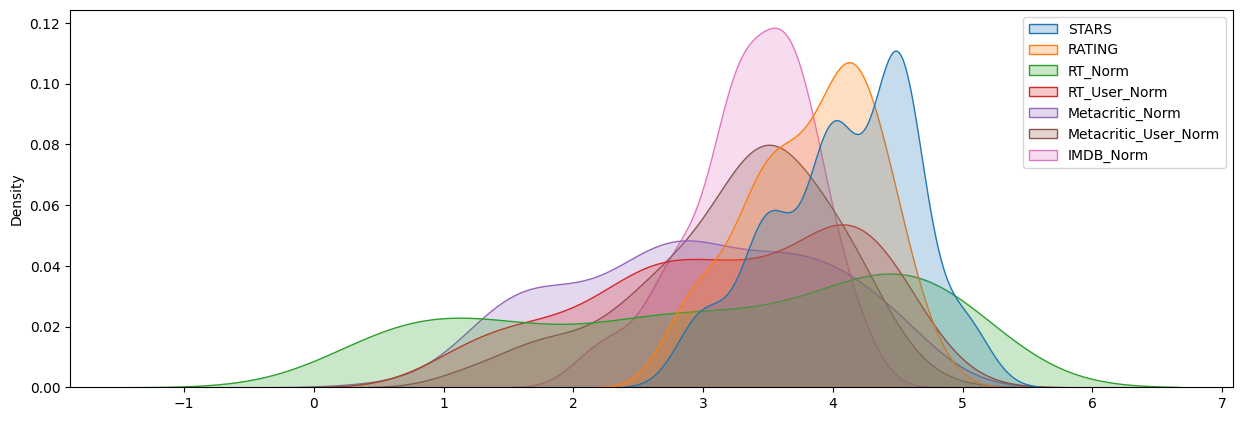

In [167]:
plt.figure(figsize=(15,5),dpi=100)
sns.kdeplot(data=norm_scores,fill=True)

In [ ]:
### Plot of Fandango displayed stars v/s Rotten Tomatoes critics ratings

<AxesSubplot:ylabel='Density'>

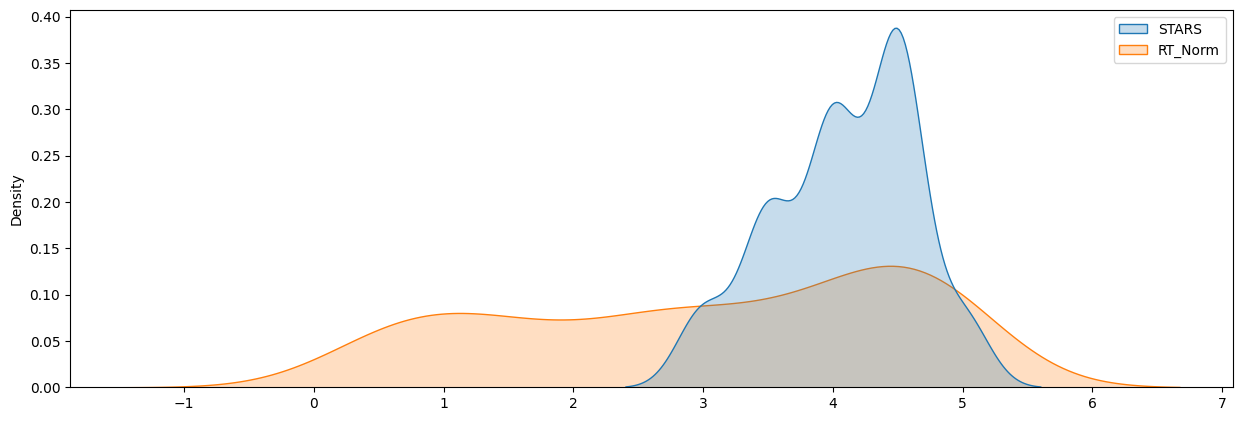

In [172]:
plt.figure(figsize=(15,5),dpi=100)
sns.kdeplot(data=norm_scores[['STARS','RT_Norm']],fill=True)

### We can clearly see Fandango reviews are on the higher side

### Finding top 10 worst movies rated according to Rotten Tomatoes

#### Adding the FILM column to the norm_scores dataframe

In [173]:
norm_scores = combined_df[['FILM','STARS','RATING','RT_Norm','RT_User_Norm','Metacritic_Norm','Metacritic_User_Norm','IMDB_Norm']]

In [174]:
norm_scores.head()

,FILM,STARS,RATING,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [179]:
norm_scores.nsmallest(10,'RT_Norm')

,FILM,STARS,RATING,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


### Distribution of ratings across all sites for the top 10 worst movies.

In [184]:
worst_films = norm_scores.nsmallest(10,'RT_Norm').drop('FILM',axis=1)

<AxesSubplot:ylabel='Density'>

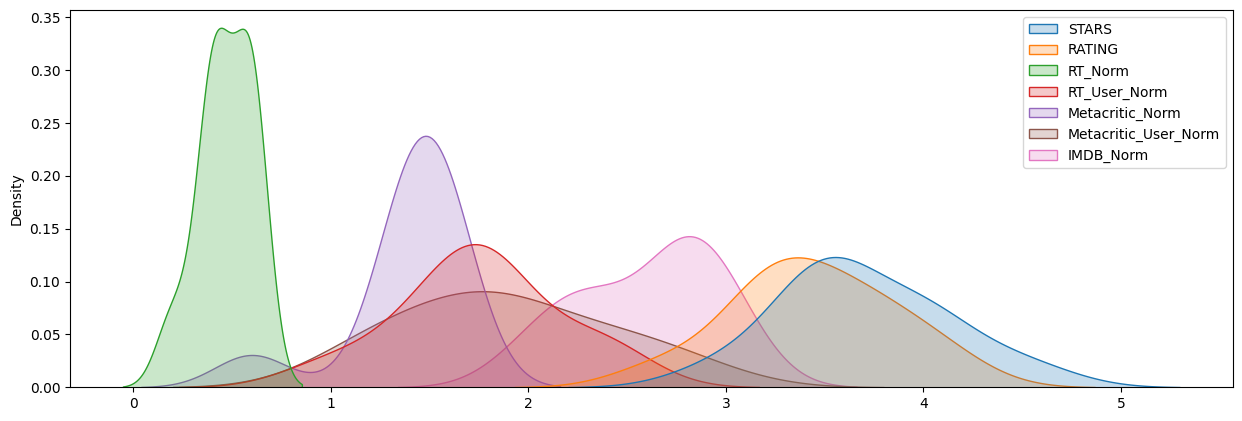

In [187]:
plt.figure(figsize=(15,5),dpi=100)
sns.kdeplot(data=worst_films,fill=True)

### Clearly shows Fandango shows inflated ratings for movies having less ratings/stars/reviews on other sites. The distrubution 
### ratings is on the higher side for Fandango.